In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.DataFrame(iris["target"], columns=["label"])
data = pd.concat([X,y], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Example: two-dimension

C:\Users\khl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


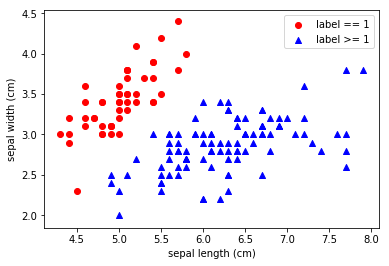

In [3]:
F1 = "sepal length (cm)"
F2 = "sepal width (cm)"
data1 = data[[F1, F2, "label"]]
data1["label"] = data1["label"].replace(0, -1).replace(2,1)

plt.scatter(data1[F1][data1["label"]==-1], data1[F2][data1["label"]==-1], marker = "o", color="red", label="label == 1")
plt.scatter(data1[F1][data1["label"]==1], data1[F2][data1["label"]==1], marker = "^", color="blue", label="label >= 1")

plt.xlabel(F1)
plt.ylabel(F2)
plt.legend(loc="upper right")

In [4]:
data1.head()

,sepal length (cm),sepal width (cm),label
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


In [5]:
TIMES = 1000 # the times for training
NUMERS = data1.shape[0] # the numbers of the data
W0 = 0 # the intercept
W = [1, 1] # the weights for F1 and F2 
LEARNING_RATE = 0.01

RECORD = pd.DataFrame(columns=["TIME", "c0", "c1", "c2"])

for t in range(TIMES):
    for n in range(NUMERS):
        features = data1.loc[n,][:2]
        label = data1.loc[n,][2]
        value = np.dot(W, features) + W0
        # Adjust the weights
        """
        if np.sign(label) == np.sign(value):
            pass
        else:
            W += LEARNING_RATE*np.sign(label)*features
            W0 += LEARNING_RATE
        """
        W += LEARNING_RATE*((np.sign(label)-np.sign(value))/2)*features
        W0 += LEARNING_RATE*((np.sign(label)-np.sign(value))/2)
    # Record the weights
    if t % 100 == 0:
        RECORD = RECORD.append({"TIME":t, "c0":W0, "c1":W[0], "c2":W[1]}, ignore_index=True)

In [6]:
RECORD

,TIME,c0,c1,c2
0,0.0,-0.21,-0.024,0.261
1,100.0,-0.32,0.393,-0.494
2,200.0,-0.45,0.555,-0.752
3,300.0,-0.69,0.614,-0.854
4,400.0,-0.87,0.679,-0.884
5,500.0,-1.02,0.734,-0.911
6,600.0,-1.13,0.806,-0.953
7,700.0,-1.21,0.780,-1.000
8,800.0,-1.21,0.780,-1.000
9,900.0,-1.21,0.780,-1.000


In [7]:
def scatterplot_with_line(DATA, W):
    u = np.linspace(-100,100,10000)
    v = -W[2]/W[3] * u - W[1]/W[3]

    plt.scatter(DATA[F1][DATA["label"]==-1], DATA[F2][DATA["label"]==-1], marker = "o", color="red", label="label == 1")
    plt.scatter(DATA[F1][DATA["label"]==1], DATA[F2][DATA["label"]==1], marker = "^", color="blue", label="label >= 1")

    plt.xlim(4, 8)
    plt.ylim(2, 5)
    plt.title("The numbers of iterations: %s" % int(W[0]))
    plt.plot(u,v)
    

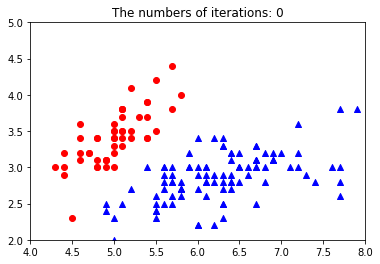

In [8]:
scatterplot_with_line(data1, RECORD.loc[0])

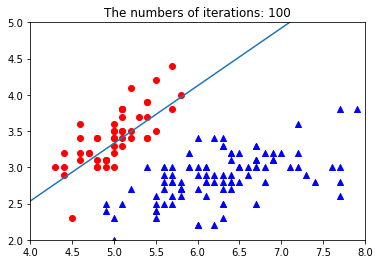

In [9]:
scatterplot_with_line(data1, RECORD.loc[1])

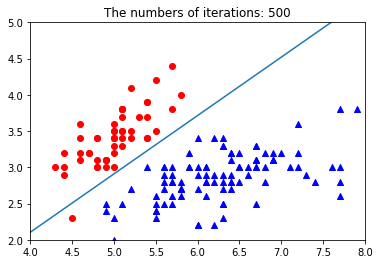

In [10]:
scatterplot_with_line(data1, RECORD.loc[5])

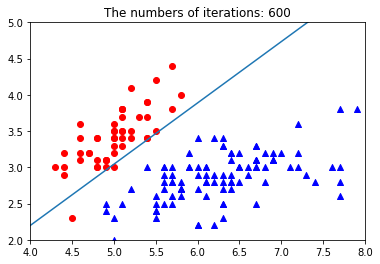

In [11]:
scatterplot_with_line(data1, RECORD.loc[6])

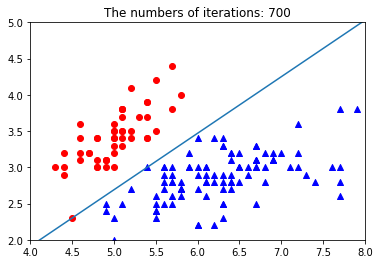

In [12]:
scatterplot_with_line(data1, RECORD.loc[7])